# **Principal Component Analysis (PCA) From Scratch Enhancement**

## Introduction

The primary purpose of this lab is to deepen the understanding of Principal Component Analysis (PCA) through a detailed exploration of its mathematical foundations, practical applications, and comparative analysis with other dimensionality reduction techniques. By enhancing the lab with interactive elements, comparative analyses, and practical examples, students will gain a comprehensive view of how PCA functions and its place in the data science toolkit.

# Mathematical Derivation of PCA

Principal Component Analysis (PCA) is a technique used to emphasize variation and bring out strong patterns in a dataset. It's often used to make data easy to explore and visualize. Here, we will derive the PCA step by step:

## Step 1: Standardizing the Dataset
The first step in PCA is to standardize the data. This involves subtracting the mean and dividing by the standard deviation for each value of each variable.

## Step 2: Computing the Covariance Matrix
Once the data is standardized, we compute the covariance matrix to understand how each variable relates with the others. The covariance matrix is given by:

$$
 \Sigma = \frac{1}{n-1} \times (X - \bar{X})^\top (X - \bar{X})
$$

## Step 3: Eigenvalue Decomposition
The next step is to compute the eigenvalues and eigenvectors of the covariance matrix. The eigenvectors point in the direction of the axis that explain the most variance, while the eigenvalues indicate the magnitude of this variance.

## Step 4: Selecting Principal Components
The last step is to select the top k eigenvectors (where k is the number of dimensions we wish to keep) based on the largest eigenvalues. These principal components are the directions where there is the most variance, i.e., where the data is most spread out.



## Step 5: PCA Implementation from Scratch in Python

### Import Libraries

In [7]:
import numpy as np
import matplotlib.pyplot as plt

### Standardize the Dataset

In [8]:
def standardize_data(X):
    """ Standardize the dataset to zero mean and unit variance. """
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_standardized = (X - mean) / std
    return X_standardized

### Compute the Covariance Matric

In [9]:
def compute_covariance_matrix(X):
    """ Compute the covariance matrix for the dataset. """
    return np.cov(X, rowvar=False)

### Eigenvalue Decomposition

In [10]:
def eigen_decomposition(cov_matrix):
    """ Perform eigenvalue decomposition of the covariance matrix. """
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    # Sort eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    return sorted_eigenvalues, sorted_eigenvectors

### Select Principal Components

In [11]:
def select_principal_components(eigenvectors, num_components):
    """ Select the top 'num_components' eigenvectors as principal components. """
    return eigenvectors[:, :num_components]

## Example usage with a Real-World Dataset

### Load a Real-World Dataset: Iris Dataset

**Iris**

The Iris dataset is a classic dataset in machine learning and statistics.

It consists of 150 samples of iris flowers from three different species: setosa, versicolor, and virginica.

The dataset includes four features for each sample: sepal length, sepal width, petal length, and petal width.

There are three classes, each corresponding to a species of iris flower, with each class having 50 samples.

The Iris dataset is readily available in the sklearn library.

We will now apply PCA to the Iris dataset and visualize the first two principal components.

In [12]:
from sklearn.datasets import load_iris
import pandas as pd

# Load Iris data
data = load_iris()
X = data['data']
feature_names = data['feature_names']
y = data['target']
target_names = data['target_names']

# Convert to DataFrame for easier manipulation and visualization
iris_df = pd.DataFrame(X, columns=feature_names)

### Apply PCA

We'll use the functions previously defined for standardizing data, computing the covariance matrix, performaing eigenvalue decomposition and selecting principal components.

In [13]:
# Standardize the dataset
X_standardized = standardize_data(X)

# Compute the covariance matrix
cov_matrix = compute_covariance_matrix(X_standardized)

# Eigenvalue decomposition
eigenvalues, eigenvectors = eigen_decomposition(cov_matrix)

# Select the number of principal components (e.g., 2 for visualization)
num_components = 2
principal_components = select_principal_components(eigenvectors, num_components)

# Project the data onto the first two principal components
X_pca = X_standardized @ principal_components


### Calculate Variance Explained by Each Principal Component

Before we can explain the PCA results, we first need to calculate how much variance each prinicap components accounts for. This can be dericed from the eigenvalues obtained during PCA.

In [15]:
# Calculate total variance
total_variance = sum(eigenvalues)
# Calculate variance explained by each principal component
variance_explained = [(i / total_variance) * 100 for i in sorted(eigenvalues, reverse=True)]
# Calculate cumulative variance explained
cumulative_variance_explained = np.cumsum(variance_explained)

# Print the results
print("Variance Explained by Each Component: ", variance_explained)
print("Cumulative Variance Explained: ", cumulative_variance_explained)

Variance Explained by Each Component:  [72.9624454132999, 22.850761786701746, 3.6689218892828577, 0.5178709107154885]
Cumulative Variance Explained:  [ 72.96244541  95.8132072   99.48212909 100.        ]


**Interpretation of Variance Explained**

The variance explained by each principal component and the cumulative variance are crucial to understanding the dimensionality reduction performed by PCA:

1. **Principal Component 1:** This component explains approximately 72.96% of the variance. This high percentage indicates that most of the dataset's information (variation) is captured along this axis. It suggests that this component is dominant and likely encapsulates key differences among the observations.

2. **Principal Component 2:** This component accounts for about 22.85% of the variance, bringing the cumulative variance explained by the first two components to 95.81%. This significant value shows that together with the first component, you have a comprehensive view of the data.

3. **Other Components:** The third and fourth components explain very little additional variance (3.67% and 0.52% respectively), which justifies reducing the dimensionality to two principal components without losing substantial information.

### Visualize the PCA Results

We will use a scatter plot to visualize how the Iris dataset is distributed when projected onto the first two prinicpal components. This visual representation helps in understanding how well PCA has performed in terms of clustering and separation of different classes (species of Iris).

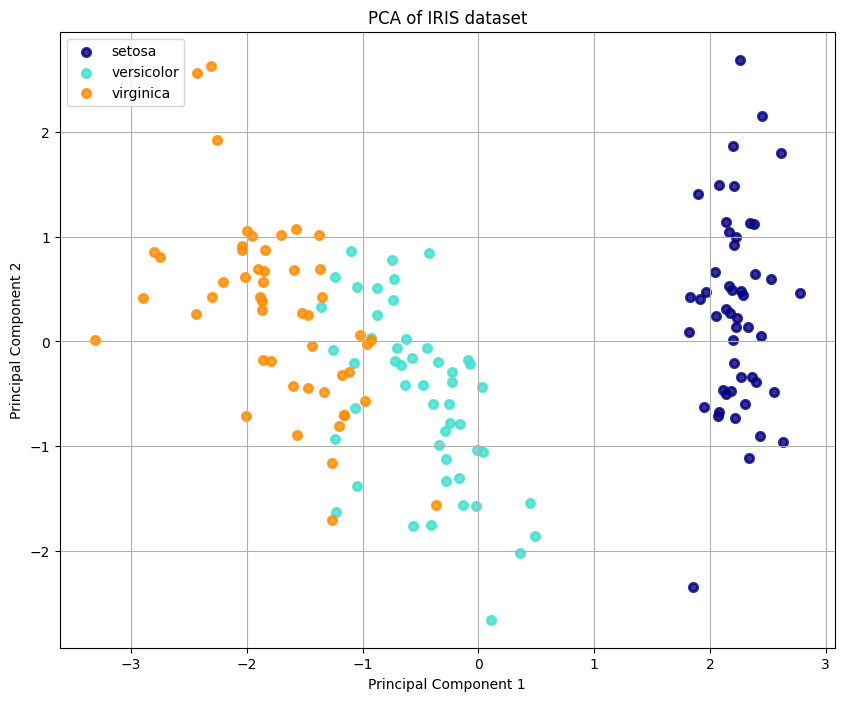

In [14]:
plt.figure(figsize=(10, 8))
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


* **Setosa (blue dots)**: This species is well-separated from the other two
across the first principal component. The clear separation suggests that Setosa has distinct characteristics compared to Versicolor and Virginica, which are captured by the principal component.

* **Versicolor (orange dots) and Virginica (green dots)**: These two species are more intertwined but still show some degree of separation along both principal components. There's a noticeable overlap, indicating some similarity in their characteristics that PCA has partially distinguished but not as distinctly as with Setosa.



### Biplot Visualization

A biplot is a type of plot that will allow us to visualize both the scores (the transformed data points) and the loadings (the directions and magnitudes of the original variables) on the principal components.

This helps us in understanding how each original feature contributes to the principal components.

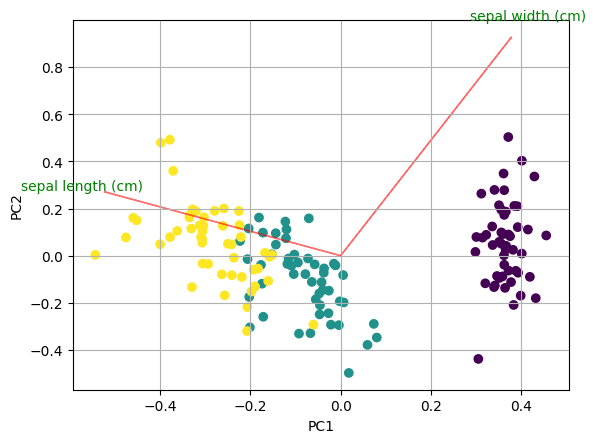

In [17]:
def biplot(score, coeff, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())

    plt.scatter(xs * scalex, ys * scaley, c=y)  # Plot transformed data points

    for i in range(coeff.shape[0]):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.1, coeff[i,1] * 1.1, "Var"+str(i+1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i,0]* 1.1, coeff[i,1] * 1.1, labels[i], color='g', ha='center', va='center')

    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid(True)
    plt.show()

# Call the biplot function
biplot(X_pca, np.transpose(principal_components), labels=feature_names)


**Explanation of the Biplot**

1. **Data Points:**

* The dots represent the Iris dataset samples projected onto the first two principal components (PC1 and PC2).

* The colors likely represent different species within the Iris dataset, showing how each species clusters within the new feature space created by PCA.

2. **Vectors (Arrows):**

* The arrows represent the loadings of the original features on the principal components. In this biplot, it appears you have two arrows, likely corresponding to two of the original features in the Iris dataset: sepal length and sepal width.

* The direction of the arrow indicates the direction of the maximum variance for that feature. The length of the arrow indicates the strength of the feature's contribution to that principal component.

3. **Interpreting the Arrows:**

* Sepal Length: The arrow labeled "sepal length (cm)" points roughly in the direction along PC1, suggesting that sepal length has a strong positive influence on this principal component. This indicates that variation in sepal length significantly explains the variance along PC1.

* Sepal Width: The arrow for "sepal width (cm)" points in a different direction, showing how changes in sepal width are influencing the variance explained primarily by PC2. The direction indicates a diverging influence from sepal length, suggesting these features contribute differently to the data spread.

4. **Cluster Interpretation:**

* The way species clusters separate along these principal components can tell you about the underlying structure of the data. For example, if one species is distinctly separated along PC1, it implies that this species has unique characteristics highly correlated with sepal length variations.

**Using the Biplot for Analysis**

* **Species Differentiation:** You can use the biplot to discuss how well PCA has performed in terms of separating different species based on the original features. If the species are well-separated in the PCA feature space, it indicates that PCA has effectively captured the key differences between species.

* **Feature Influence:** Discuss how the projection of features onto the principal components helps in understanding the dataset. For instance, if one component is heavily influenced by sepal length, any analysis involving this component should take into account the significant role played by sepal length.

### Interactive Widgets

We integrate an interactive widgets to allow uses to dynamically change the number of principal components and observe how it affects the variance explained and the visualization.

In [27]:
from ipywidgets import interact, IntSlider
from sklearn.decomposition import PCA

def interactive_pca(n_components):
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_standardized)

    # Decide on the type of plot based on the number of components
    if n_components > 2:
        from mpl_toolkits.mplot3d import Axes3D
        fig = plt.figure(figsize=(8, 6))
        ax = fig.add_subplot(111, projection='3d')
        scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap='viridis', edgecolor='k', s=50)
        ax.set_xlabel('Principal Component 1')
        ax.set_ylabel('Principal Component 2')
        ax.set_zlabel('Principal Component 3')
    else:
        plt.figure(figsize=(8, 6))
        scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')

    plt.colorbar(scatter, label='Species')
    plt.title(f'PCA: First {min(n_components, 3)} Components')
    plt.grid(True)
    plt.show()

    explained_variance = np.sum(pca.explained_variance_ratio_) * 100
    print(f"Total Variance Explained by {n_components} Components: {explained_variance:.2f}%")

interact(interactive_pca, n_components=IntSlider(min=2, max=4, step=1, value=2))

interactive(children=(IntSlider(value=2, description='n_components', max=4, min=2), Output()), _dom_classes=('…

<function __main__.interactive_pca(n_components)>

**Overview of Interactive PCA Widget**

This widget allows users to dynamically adjust the number of principal components (PCs) used in PCA and immediately see the impact on the dataset's projection and the explained variance. This interactivity can enhance understanding of PCA's dimensionality reduction capabilities.

**Components of the Widget**

1. **PCA Initialization:**

* **PCA(n_components=n_components)**: Initializes a PCA object from scikit-learn with a dynamically adjustable number of components (**n_components**), which the user sets using the slider.

2. **Data Transformation:**

* **X_pca = pca.fit_transform(X_standardized)**: Applies PCA to the standardized dataset (**X_standardized**). This method fits the PCA model to the data and then transforms the data into the principal component space.

3. **Conditional Plotting:**

* **2D Plot:** For 2 principal components, a 2D scatter plot is generated.

* **3D Plot:** For more than 2 components, a 3D scatter plot is created using **mpl_toolkits.mplot3d.Axes3D**. This helps visualize the data in three dimensions, providing a deeper insight into the dataset's structure.

4. **Colorbar and Labels:**

* The plots use a colorbar to represent different species, aiding in the visual distinction of clusters formed based on species.

* Each axis is labeled according to the principal component it represents, enhancing interpretability.

5. **Variance Explanation:**

* After plotting, the widget prints the total variance explained by the selected number of components. This information is crucial for understanding how much information (in terms of data variance) is retained after reducing the dimensionality.

### Comparative Analysis

Compare PCA to other dimensionality reduction techniques such as t-SNE and LDA to provide insights into when and why to use PCA over other methods.

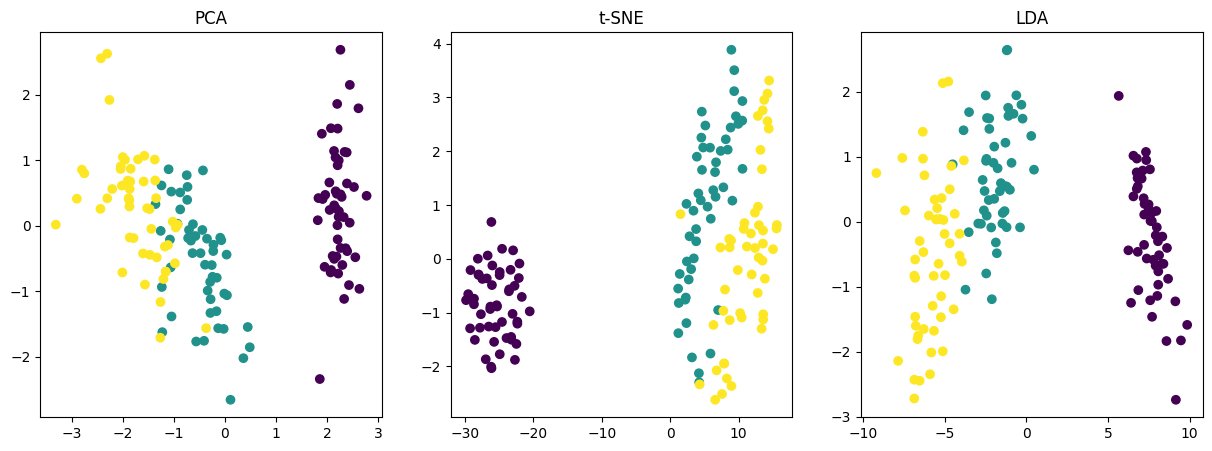

In [28]:
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# t-SNE
X_tsne = TSNE(n_components=2).fit_transform(X_standardized)
# LDA
X_lda = LDA(n_components=2).fit_transform(X_standardized, y)

# Visualize
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.title('PCA')

plt.subplot(132)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y)
plt.title('t-SNE')

plt.subplot(133)
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y)
plt.title('LDA')
plt.show()


**Comparative Analysis of PCA, t-SNE, and LDA**

##### 1. **Principal Component Analysis (PCA)**

* **Description:** PCA is a linear dimensionality reduction technique that identifies the directions (principal components) along which the variance of the data is maximized.

* **Visualization:** In the PCA plot, you can see how the data is spread mostly along the first principal component. PCA tends to preserve global distances between data points.

* **Strengths:** Effective in reducing dimensionality while preserving as much variance as possible. Good for applications where preserving the global data structure is important.

* **Weaknesses:** May not perform well if the inherent data structure is highly non-linear or if the important features for discrimination are not those that have high variances.

##### 2. **t-Distributed Stochastic Neighbor Embedding (t-SNE)**

* **Description:** t-SNE is a non-linear technique that is particularly well suited for the visualization of high-dimensional datasets. It converts affinities of data points to probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data.

* **Visualization:** The t-SNE plot shows a clear separation among the three Iris species, with each cluster more distinctly isolated than in the PCA plot. t-SNE excels at creating visually appealing clusters at the cost of some interpretability in terms of how dimensions relate to features.

* **Strengths:** Excellent for identifying clusters in data. Useful in exploratory data analysis to understand the structure of the data.

* **Weaknesses:** Computationally intensive, sensitive to hyperparameters, and the results can vary significantly based on these settings. Not suitable for reducing dimensions as a preprocessing step for predictive modeling because it does not preserve distances in a way that is meaningful for such applications.

##### 3. **Linear Discriminant Analysis (LDA)**

* **Description:** LDA is both a classifier and a dimensionality reduction technique. It reduces dimensions by projecting the data onto a lower-dimensional space that maximizes the separability between multiple classes.

* **Visualization:** The LDA plot demonstrates how the algorithm focuses on maximizing the separation between the classes. The data points are more linearly separable than in the PCA plot, indicating the effectiveness of LDA in class-separation tasks.

* **Strengths:** Very effective in cases where the goal is to maximize class separability. Uses class labels to guide the dimensionality reduction, which is useful in supervised learning contexts.

* **Weaknesses:** Assumes data is normally distributed within each class and that classes have identical covariance matrices, which may not always hold true.

## Conclusion


**Key Learnings**

1. **Understanding PCA:**

* We have explored how Principal Component Analysis (PCA) serves as an effective tool for dimensionality reduction, enabling clearer visualization and analysis of high-dimensional data. By implementing PCA from scratch, we gained a deep understanding of its mathematical foundations and computational steps.

2. **Comparative Analysis:**

* The comparative analysis between PCA, t-SNE, and LDA provided insightful contrasts on how different algorithms handle dimensionality reduction. This helped in understanding the strengths and suitability of each method under various data characteristics and analysis objectives.

3. **Interactive Learning:**

* The integration of interactive widgets allowed for dynamic exploration of PCA, offering a hands-on experience that enhances learning. By adjusting the number of principal components, we could immediately see the impact on data visualization and variance explanation.

4. **Practical Application:**

* Applying PCA to the Iris dataset demonstrated its utility in extracting important features and reducing dimensions without losing significant information. This practical application underscores PCA's value in real-world data analysis.

This enhanced PCA lab has aimed to provide a comprehensive and interactive learning experience, deepening understanding and encouraging the practical application of machine learning concepts. We hope these exercises have sparked curiosity and inspired further exploration into the powerful field of machine learning. Let’s continue to explore and innovate with data to uncover new insights and solutions.
